In [2]:
import requests

API_KEY = "c48d045a140a4c923f7fa8e461229831"  # Replace with your OpenWeatherMap API key
BASE_URL = "http://api.openweathermap.org/data/2.5/weather"

def get_weather(city):
    params = {
        "q": city,
        "appid": API_KEY,
        "units": "metric"  # Celsius
    }
    try:
        response = requests.get(BASE_URL, params=params)
        data = response.json()
        
        if data["cod"] != 200:
            print("Error:", data["message"])
            return
        
        temp = data["main"]["temp"]
        humidity = data["main"]["humidity"]
        description = data["weather"][0]["description"]
        print(f"Weather in {city.title()}:")
        print(f"Temperature: {temp}°C")
        print(f"Humidity: {humidity}%")
        print(f"Condition: {description.capitalize()}")
    
    except requests.exceptions.RequestException as e:
        print("Error fetching data:", e)

def main():
    city = input("Enter city name: ")
    get_weather(city)

if __name__ == "__main__":
    main()


Weather in London:
Temperature: 0.3°C
Humidity: 88%
Condition: Broken clouds


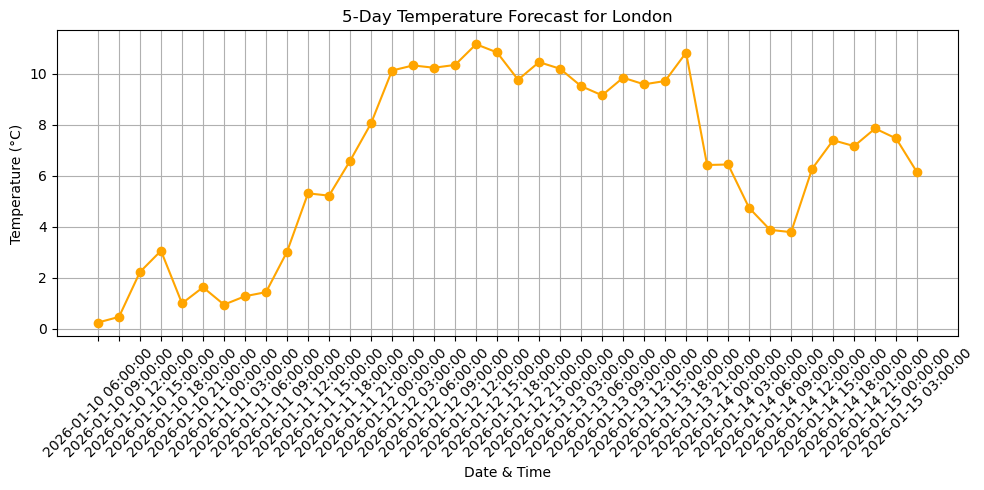

In [5]:
import requests
import matplotlib.pyplot as plt

API_KEY = "c48d045a140a4c923f7fa8e461229831"  # OpenWeatherMap API Key
CITY = "London"

# Fetch 5-day forecast data
url = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"
response = requests.get(url)
data = response.json()

# Extract temperature and time
temps = [item['main']['temp'] for item in data['list']]
times = [item['dt_txt'] for item in data['list']]

# Plot temperature trend
plt.figure(figsize=(10,5))
plt.plot(times, temps, marker='o', color='orange')
plt.xticks(rotation=45)
plt.xlabel("Date & Time")
plt.ylabel("Temperature (°C)")
plt.title(f"5-Day Temperature Forecast for {CITY}")
plt.grid(True)
plt.tight_layout()
plt.show()


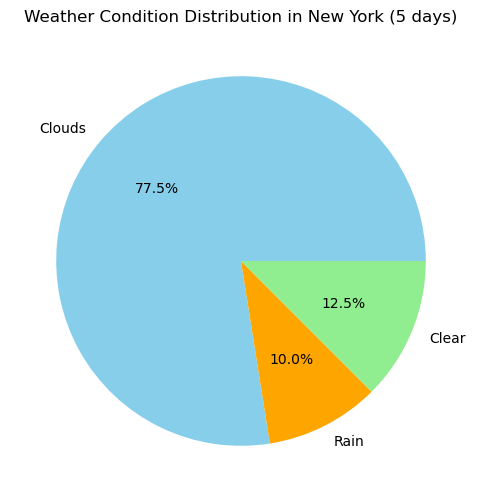

In [8]:
import requests
import matplotlib.pyplot as plt
from collections import Counter

API_KEY = "c48d045a140a4c923f7fa8e461229831"
CITY = "New York"

url = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"
response = requests.get(url)
data = response.json()

# Count weather conditions
conditions = [item['weather'][0]['main'] for item in data['list']]
condition_count = Counter(conditions)

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(condition_count.values(), labels=condition_count.keys(), autopct='%1.1f%%', colors=['skyblue','orange','lightgreen','pink'])
plt.title(f"Weather Condition Distribution in {CITY} (5 days)")
plt.show()


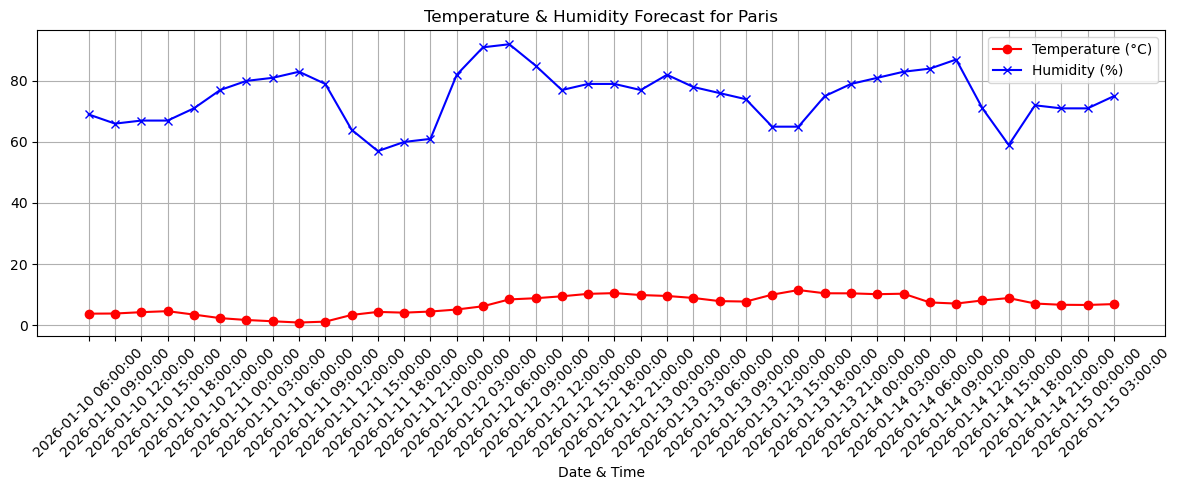

In [7]:
import requests
import matplotlib.pyplot as plt

API_KEY = "c48d045a140a4c923f7fa8e461229831"
CITY = "Paris"

url = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"
data = requests.get(url).json()

temps = [item['main']['temp'] for item in data['list']]
humidity = [item['main']['humidity'] for item in data['list']]
times = [item['dt_txt'] for item in data['list']]

plt.figure(figsize=(12,5))
plt.plot(times, temps, marker='o', label='Temperature (°C)', color='red')
plt.plot(times, humidity, marker='x', label='Humidity (%)', color='blue')
plt.xticks(rotation=45)
plt.xlabel("Date & Time")
plt.title(f"Temperature & Humidity Forecast for {CITY}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
